# DSCI 100 Group 7 Project Proposal 
## Classification of Video Game Genres Based On Sales in Different Regions
##### Group Members: Alison Wai, Charlie Li, Sandro Xu, Qingyue Guo

### Introduction
PlayStation 4 is a video game console released by Sony in 2013. Since then, countless video games of different genres have been released with varying levels of success in sales. 

**About the data**

This data set from Kaggle explores game sales data for the PS4 platform, with information on the game name, year of publication, genre, publisher, North America sales, Europe sales, Japan sales, rest of the world sales, and total global sales. 

**With the information from this dataset, we will try to answer the following question:**

If we create a new PS4 game with the goal of selling at least 1 million copies in both North America and Europe, what genre of game should we release?

### Preliminary Exploratory Data Analysis

In [1]:
# Load R packages.

library(tidyverse)
library(readxl)
library(rvest)
library(digest)
library(repr)
library(tidymodels)
library(tidyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘rvest’ was built under R version 4.0.2”
Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
─

In [2]:
# First, we will read the data that we downloaded from Kaggle and uploaded to GitHub.
video_game_raw <- read_csv("https://raw.githubusercontent.com/charlie-li-02/dsci_100_data/main/PS4_GamesSales.csv")

# Then, we will remove any rows with missing values.
video_game <- na.omit(video_game_raw)

raw_rows <- nrow(video_game_raw)
cleaned_rows <- nrow(video_game)
removed_rows <- raw_rows - cleaned_rows

video_game_raw
video_game
removed_rows
# 209 rows have been removed because they have NAs.

Parsed with column specification:
cols(
  Game = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  `North America` = col_double(),
  Europe = col_double(),
  Japan = col_double(),
  `Rest of World` = col_double(),
  Global = col_double()
)



Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
The Mummy Demastered,N/A,Action,NA,0,0,0,0,0
Project Nimbus: Code Mirai,N/A,Action,NA,0,0,0,0,0
Battle Chef Brigade,N/A,Action,NA,0,0,0,0,0


Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Chaos on Deponia,2017,Adventure,Daedalic Entertainment,0,0,0,0,0
Code Vein,2018,Action,Bandai Namco Entertainment,0,0,0,0,0
Radial G Racing Revolved,2017,Racing,Tammeka Games,0,0,0,0,0


[1] 209

In [3]:
# Next, we will rename the `North America` column to `North_America` so we can refer to it easier.
# As well, mutate the type of `Genre` to factor so we can perform classification on it.
# Then, we will filter for the video games that have more than 100,000 sales globally and are published after the year 2013.
# Finally, we will select the `Genre`, `North America`, `Europe` and `Global` columns to perform our exploratory data analysis.

video_game_filtered <- video_game %>%
    rename("North_America" = "North America") %>% 
    mutate(Genre = as_factor(Genre)) %>%
    filter(Global >= 0.1, Year >= 2013) %>% 
    select(Genre, North_America, Europe, Global) 
video_game_filtered

Genre,North_America,Europe,Global
<fct>,<dbl>,<dbl>,<dbl>
Action,6.06,9.71,19.39
Shooter,6.18,6.05,15.09
Action-Adventure,5.26,6.21,13.94
⋮,⋮,⋮,⋮
Fighting,0.04,0.01,0.1
Music,0.08,0.00,0.1
Action-Adventure,0.07,0.00,0.1


In [4]:
set.seed(1)

# Spliting the data into a training set as well as a testing set, with 75% of the data being in the training set.

video_game_split <- initial_split(video_game_filtered, prop = 0.75, strata = Genre)
video_game_train <- training(video_game_split)
video_game_test <- testing(video_game_split)

In [5]:
# The resulting training set. Roughly 75% of the data are in the training set, and the rows have been randomized.

video_game_train

Genre,North_America,Europe,Global
<fct>,<dbl>,<dbl>,<dbl>
Action,6.06,9.71,19.39
Shooter,6.18,6.05,15.09
Action-Adventure,5.26,6.21,13.94
⋮,⋮,⋮,⋮
Action,0.00,0.03,0.1
Fighting,0.04,0.01,0.1
Action-Adventure,0.07,0.00,0.1


One approach to figure out the genre of our new game might be to compare the total global sales of each game genre. 

`summarise()` ungrouping output (override with `.groups` argument)



Genre,Global
<fct>,<dbl>
Action,107.67
Shooter,101.72
Action-Adventure,53.42
⋮,⋮
Party,0.61
Strategy,0.63
Visual Novel,0.15


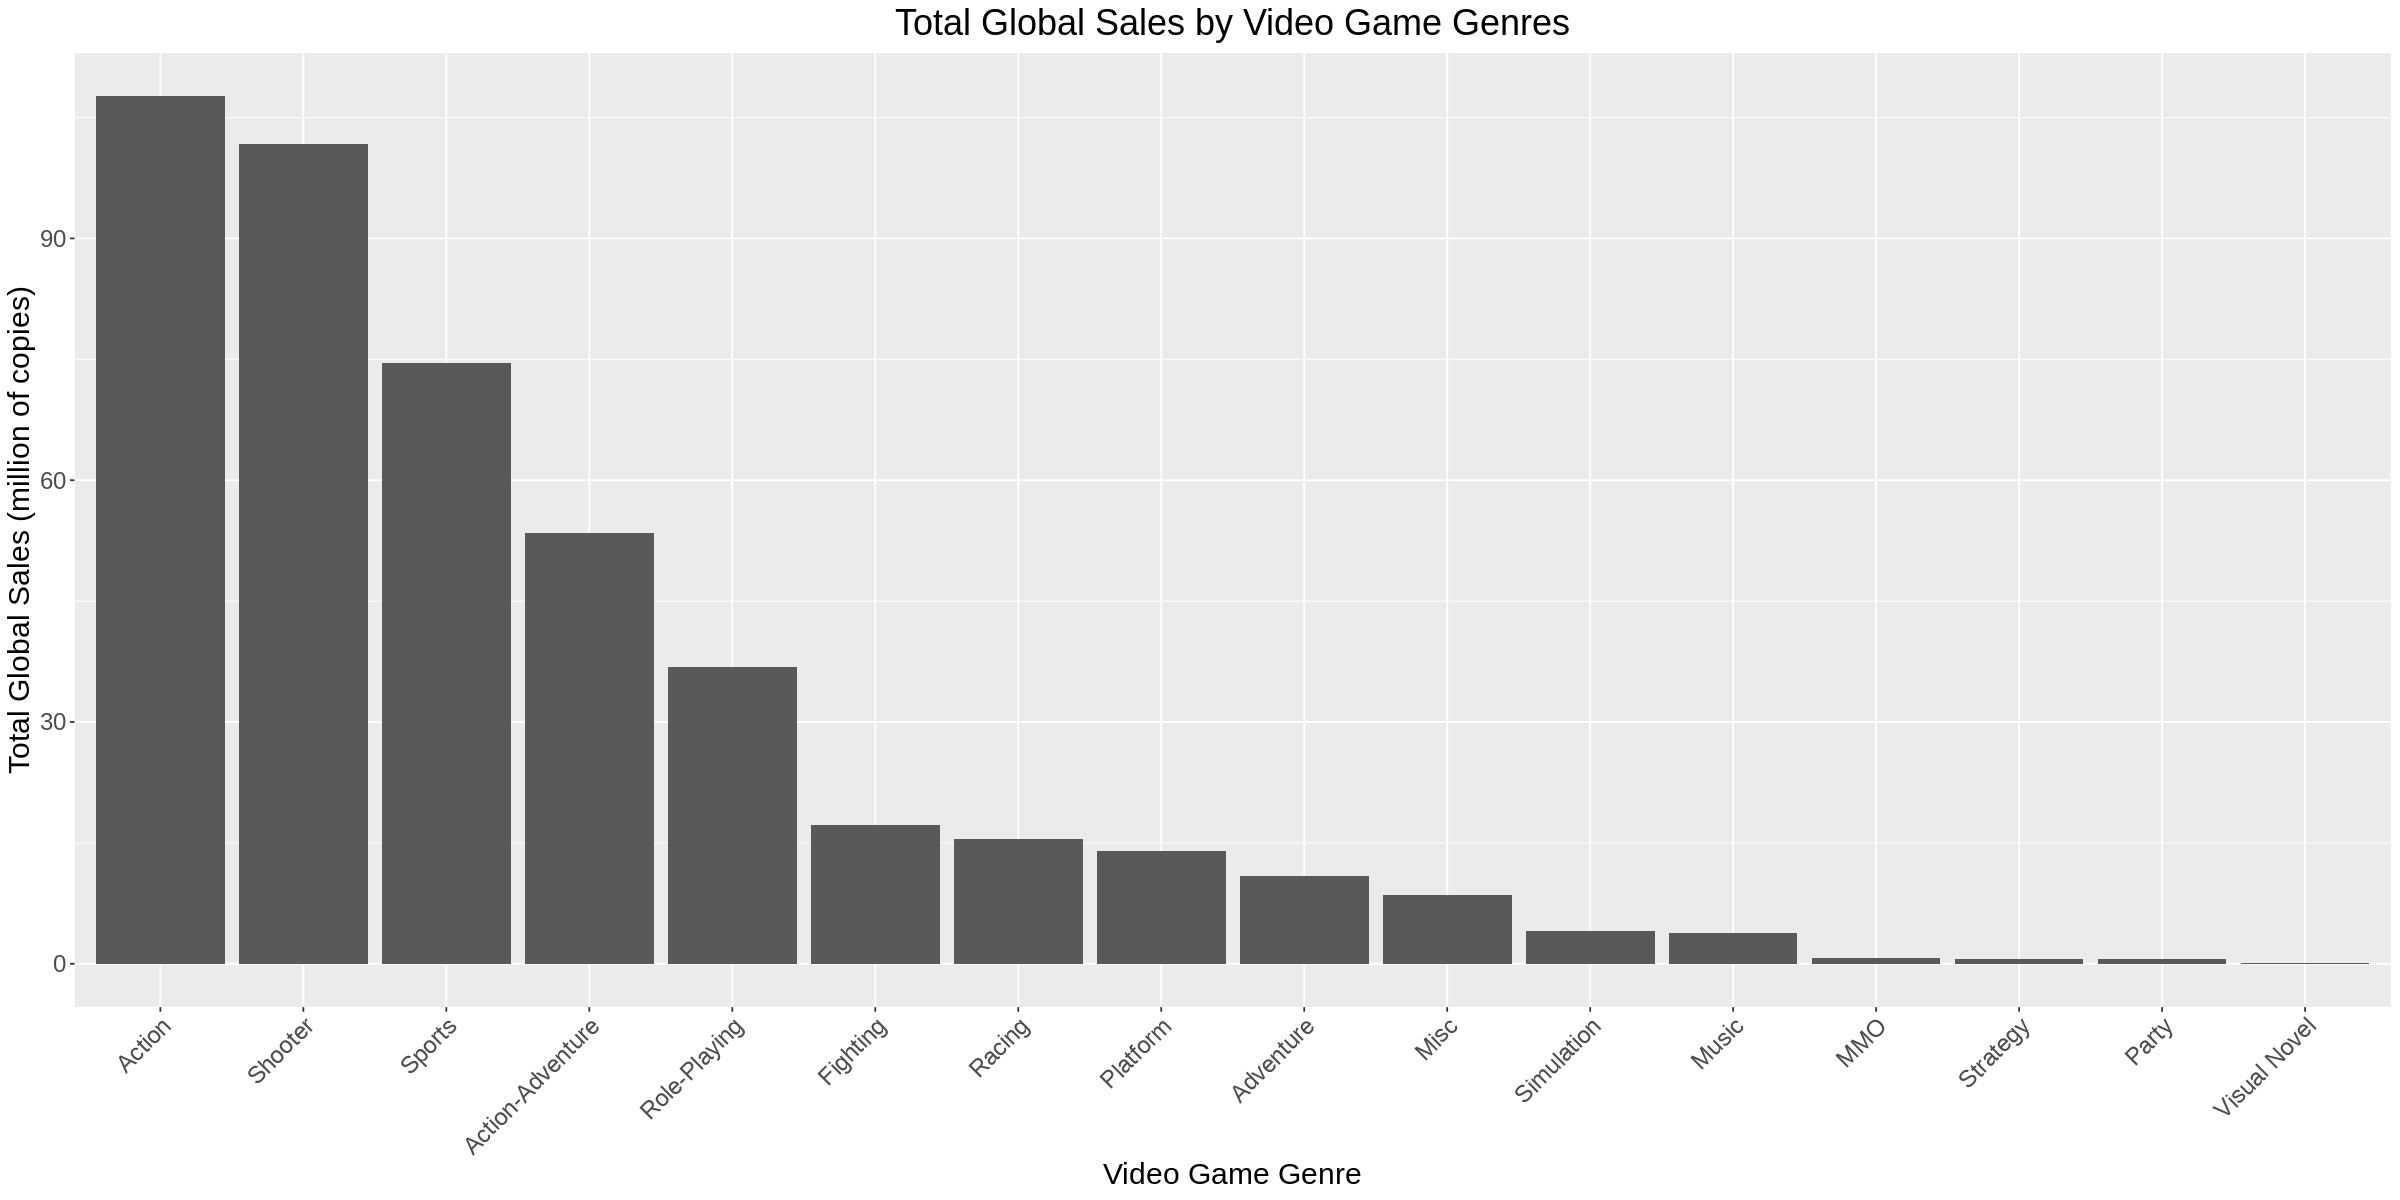

In [6]:
# We will group the data by the genre and calculate the total global sales. 

video_game_processed <- video_game_train %>%
    group_by(Genre) %>%
    summarize(Global = sum(Global))
video_game_processed

# Then, we will make a bar plot of the total global sales vs the genre.

options(repr.plot.width = 20, repr.plot.height = 10)
video_game_plot <- ggplot(video_game_processed, aes(x = fct_reorder(Genre, Global, .desc = TRUE), y = Global)) + 
    geom_bar(stat = "identity") + 
    xlab("Video Game Genre") +
    ylab("Total Global Sales (million of copies)") +
    ggtitle("Total Global Sales by Video Game Genres") +
    theme(text = element_text(size = 18), axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5)) +
    theme()
video_game_plot

But what if we wanted to know what genre our game should be if we want to hit a specific number of copies sold in North America and Europe? Let's create a scatter plot to visualize the relationship.

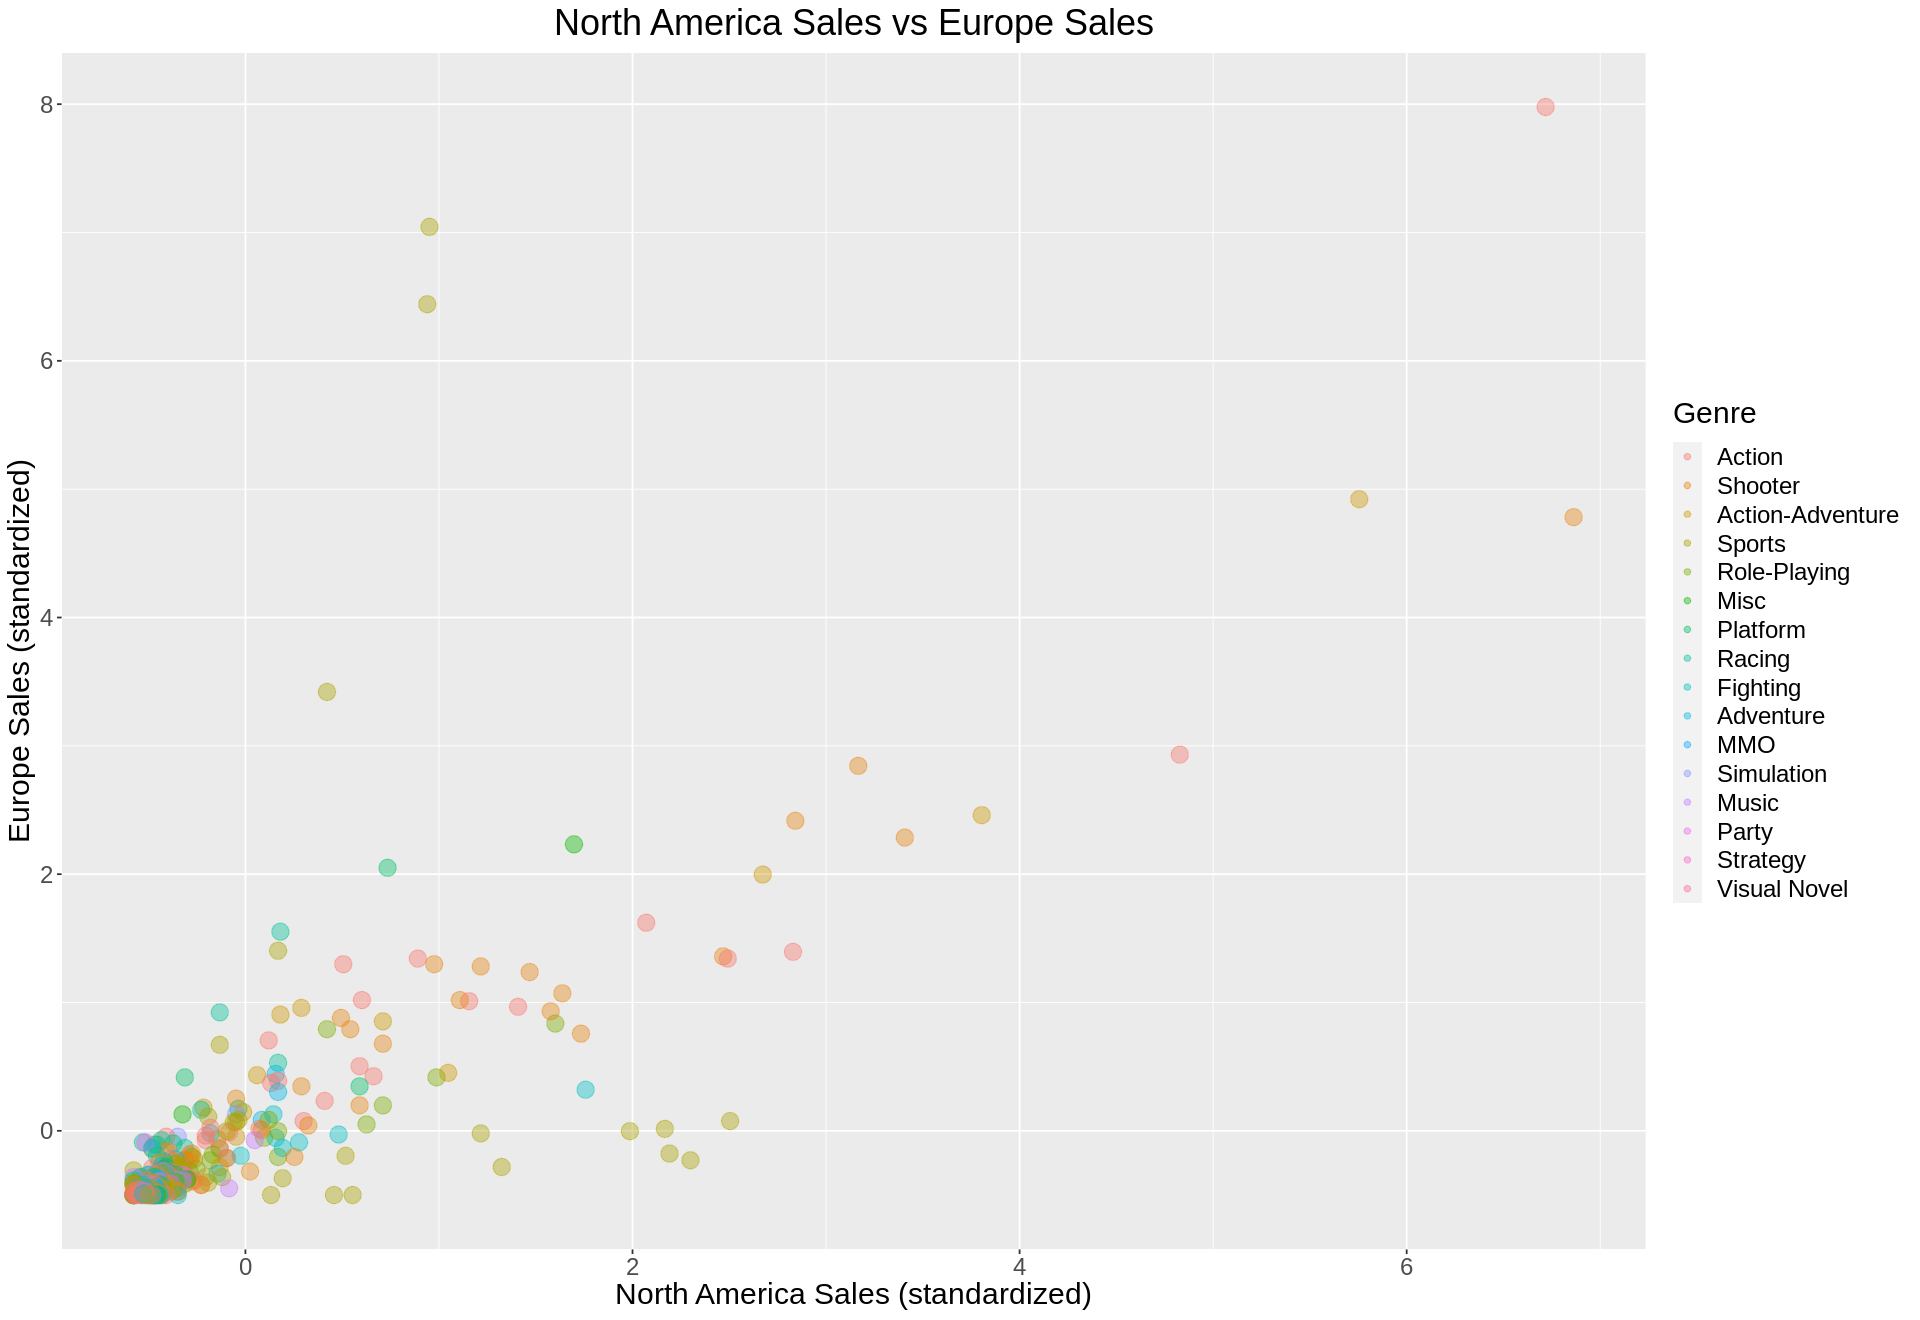

In [7]:
# Standardize the data.

video_game_recipe <- recipe(Genre ~ North_America + Europe, data = video_game_train) %>%
                       step_scale(all_predictors()) %>%
                       step_center(all_predictors())

video_game_scaled <- video_game_recipe %>%  
                           prep() %>% 
                           bake(video_game_train)

# Create the scatter plot.

options(repr.plot.width = 16, repr.plot.height = 11)

sales_plot <- ggplot(video_game_scaled, aes(x = North_America, y = Europe, color = Genre, size = 1)) +
    geom_point(alpha = 0.4) +
    scale_size(guide = "none") + 
    labs(x = "North America Sales (standardized)", y = "Europe Sales (standardized)", color = "Genre") +
    ggtitle("North America Sales vs Europe Sales") + 
    theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5))
sales_plot

Due to the nature of the dataset, the scatter plot has some overplotting issues.

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 271 rows containing missing values (geom_point).”


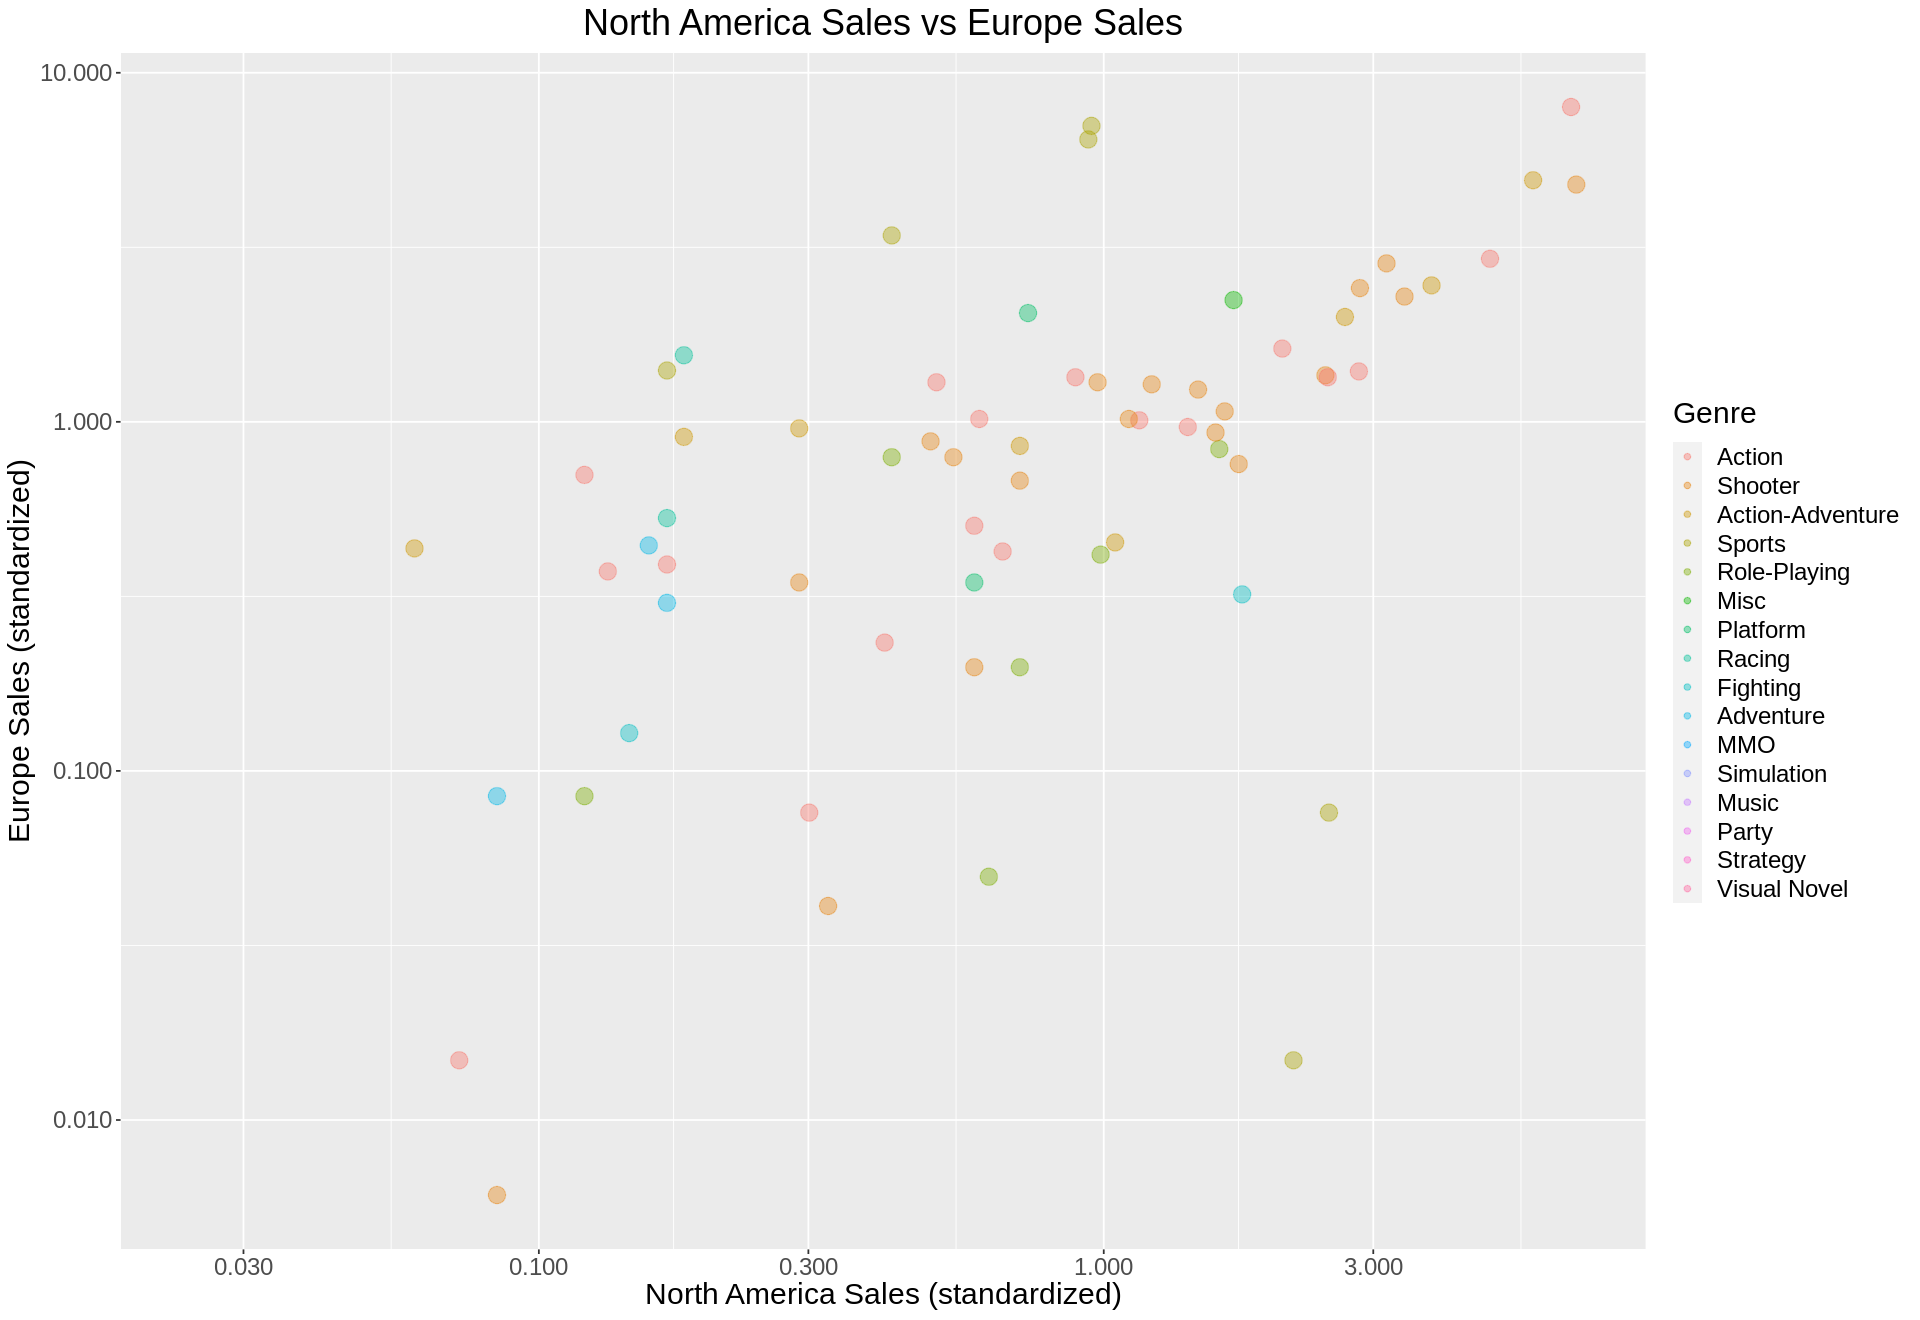

In [8]:
# Let's try logarithmic scaling.

sales_plot <- sales_plot +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma())
sales_plot

The points look better, but a lot of them have been removed. Let's try to get a better visualization of the data by filtering.

North_America,Europe,Genre
<dbl>,<dbl>,<fct>
6.717966,7.978028,Action
6.862438,4.782270,Shooter
5.754822,4.921975,Action-Adventure
⋮,⋮,⋮
0.19266446,-0.3693613,Sports
0.02411422,-0.3169718,Shooter
0.13246795,-0.5003349,Sports


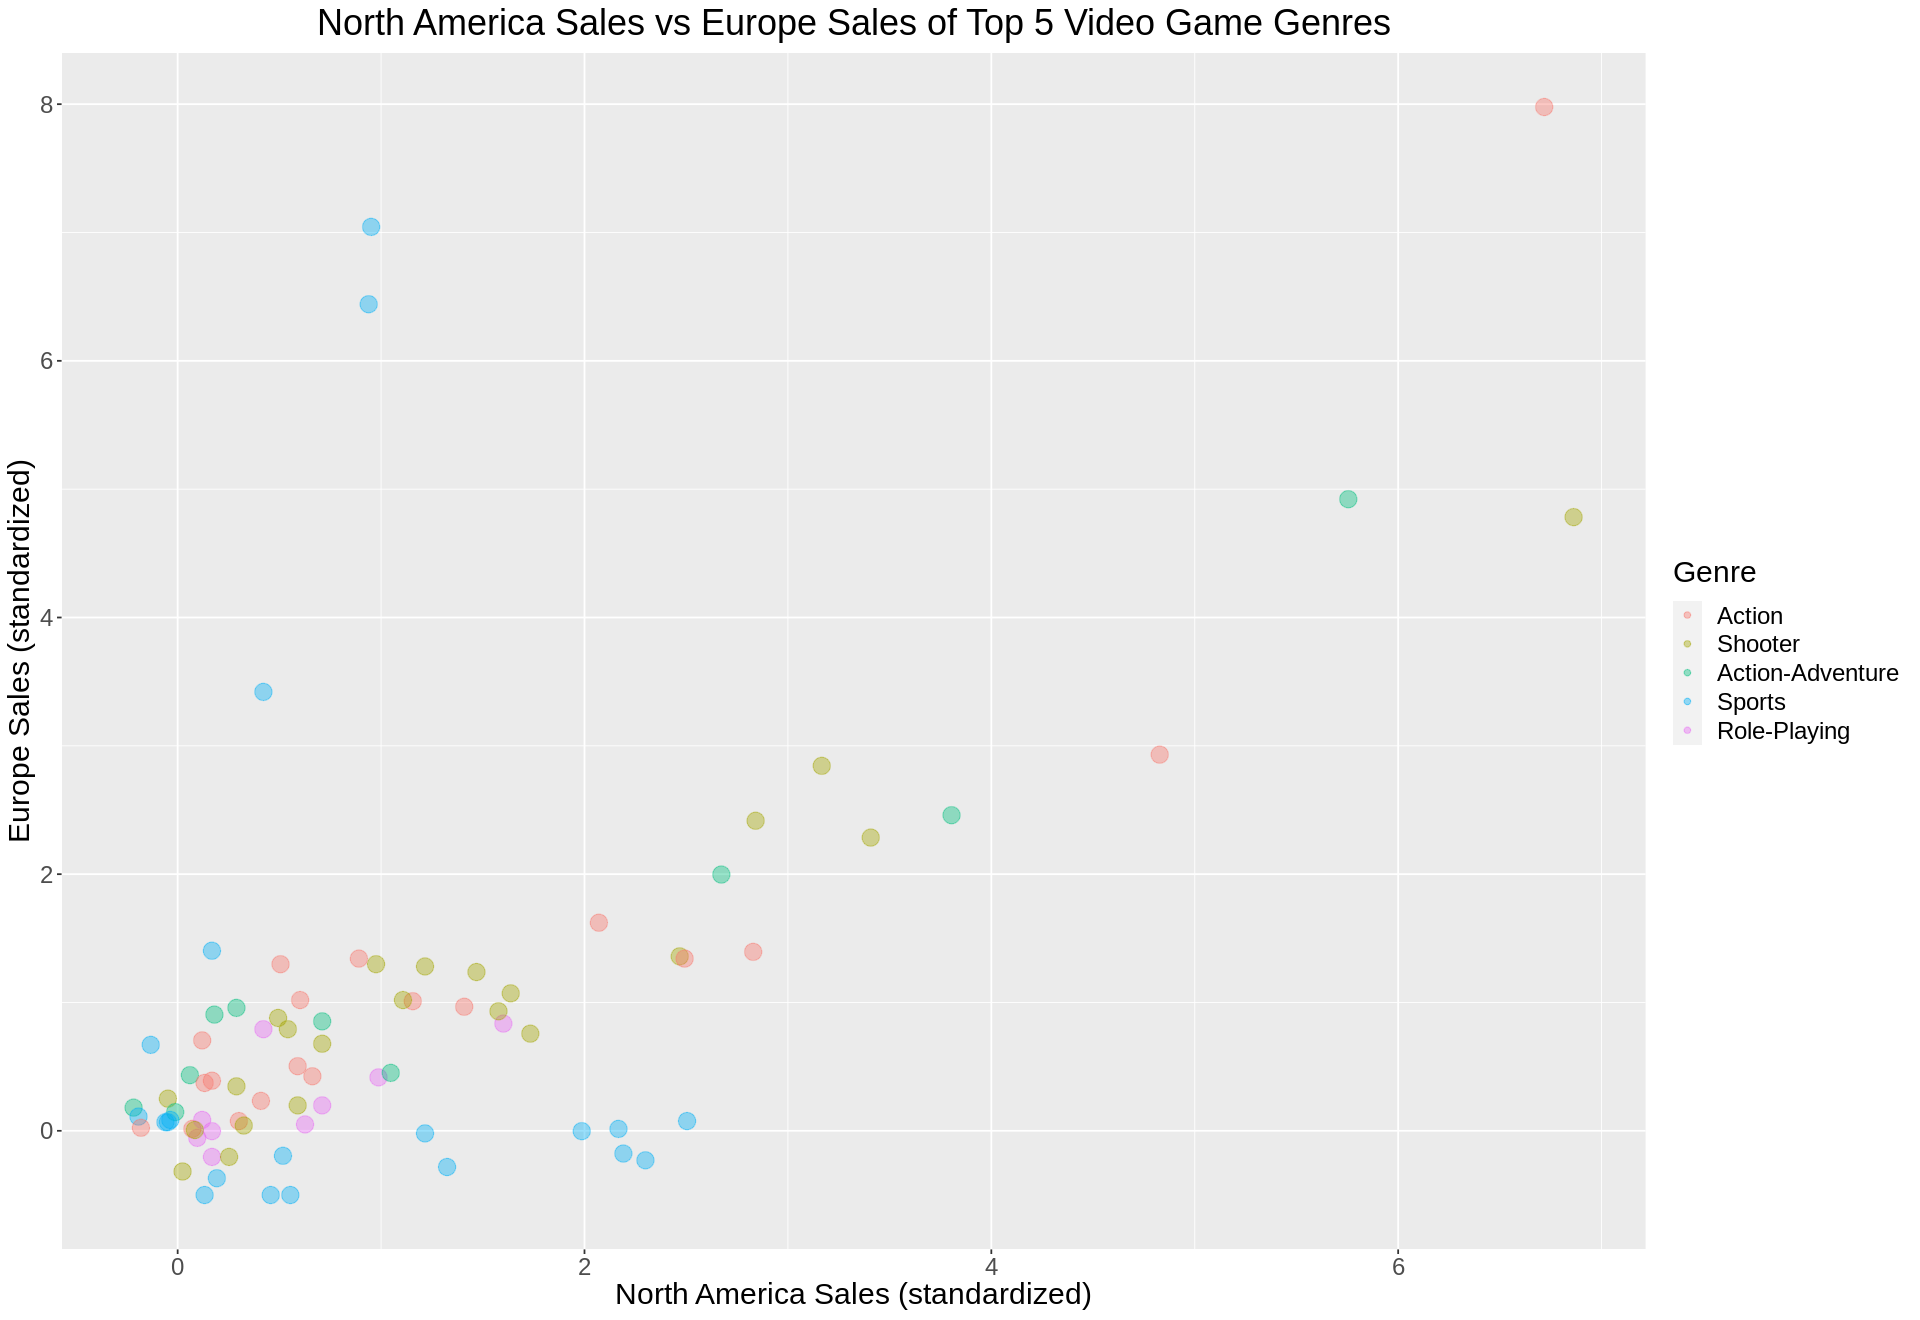

In [9]:
# We can only include the top 5 genres (`Action`, `Shooter`, `Sports`, `Action-Adventure` and `Role-Playing`) 
# that we found with the bar plot.
# Then, we will filter out the rows where the North America or Europe sales are less than 0 standardized.
# We do these filters because these data are likely more useful for us if we want our new game to succeed.

video_game_scaled_filtered <- video_game_scaled %>%
    filter(Genre %in% c("Action", "Shooter", "Sports", "Action-Adventure", "Role-Playing")) %>%
    filter(North_America >= 0 | Europe >= 0)
video_game_scaled_filtered

options(repr.plot.width = 16, repr.plot.height = 11)

top_sales_plot <- ggplot(video_game_scaled_filtered, aes(x = North_America, y = Europe, color = Genre, size = 1)) +
    geom_point(alpha = 0.4) +
    scale_size(guide = "none") + 
    labs(x = "North America Sales (standardized)", y = "Europe Sales (standardized)", color = "Genre") +
    ggtitle("North America Sales vs Europe Sales of Top 5 Video Game Genres") + 
    theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5))
top_sales_plot

We can use the $K$-nearest neighbours algorithm with this scatter plot to determine the genre of our new video game if we want to hit a particular amount of sales in North America and Europe.

### Methods
We will filter the rows with games sold after 2013, since the games sold before that year are not relevant in predicting the genres that are popular today. We will also filter the rows with global sales that are equal to or greater than 100,000 copies, since those are the games that we assume are of notable popularity. 

We will split the dataset into a testing set and a training set to create a classifier with the $K$-nearest neighbours classification on the training set, then test its accuracy with the testing set. While creating the classifier, we will standardize the data and perform cross-validation on the training set to optimize our choice of $K$.

To visualize the results, we will create a scatter plot with North America sales on the x-axis and Europe sales on the y-axis, while also plotting the new observation as a point on the scatter plot to see if our classifier’s prediction makes sense. We will also create a line graph to visualize which $K$ value has the highest accuracy.


### Expected Outcomes and Significance

We expect that shooting games will be the genre that will most likely sell at least 1 million copies in both North America and Europe. 

The findings could impact our decisions on which genre to choose for our new game release. 

In the future, we could explore which genre will most likely sell 3 million copies globally. If we have sufficient data about other platforms, we could also explore which genre of games will most likely sell a given amount of copies.